#Importing Libraries

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys
import keras  #keras creates new Blank ML model
from keras.models import Sequential
import visualkeras #visualizes Keras Model
from tensorflow.keras.models import Sequential             
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from keras.preprocessing.image import  ImageDataGenerator #feeds images into the Keras model
from keras.layers import Conv2D   #makes layers for model to sort images
from keras.layers import Flatten
from keras.layers import Dense

#Mounting the data

In [ ]:
drive.mount('/content/drive') #MyDrive is the mounting folder(server's folder that Linux is looking through)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/BrainTumorData/Training/glioma_tumor

/content/drive/MyDrive/BrainTumorData/Training/glioma_tumor


#Exploratory Data Analysis (EDA)

In [ ]:
g=cv2.imread('a.jpg')

In [ ]:
pwd#linux commands don't have ()'s

'/content/drive/MyDrive/BrainTumorData/Training/glioma_tumor'

In [ ]:
g.shape

(512, 512, 3)

In [ ]:
g

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

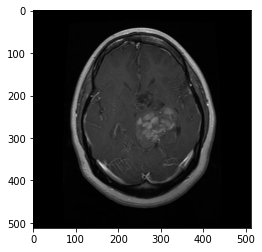

In [ ]:
plt.imshow(g)#imshow takes numpy arr as input

In [ ]:
np.set_printoptions(threshold=sys.maxsize)#prints full array

#Data preprocessing 

In [ ]:
gen=ImageDataGenerator(rescale=1//255)
#imageDataGen generates every img in the folder at a time and takes input for rescale value
#creates new scale for image colors to normalize data and make it all significant

In [ ]:
gen

In [ ]:
cd ..

/content/drive/MyDrive/BrainTumorData/Training


In [ ]:
#flow_from_directory function- connects ImageDataGenerator with all the images in file
trainingData=gen.flow_from_directory('/content/drive/MyDrive/BrainTumorData/Training',target_size=(128,128))

Found 2870 images belonging to 4 classes.


In [ ]:
#connects ImageDataGenerator to testing using the same function
testingData=gen.flow_from_directory('/content/drive/MyDrive/BrainTumorData/Testing',target_size=(128,128))

Found 394 images belonging to 4 classes.


In [ ]:
#now we build the NN
#step 1: define a model (empty model object from Sequential class) (below)
#2: add layers by using .add()

#Model Building and Intialization

In [ ]:
model = Sequential() #creates new sequential
model.add(Conv2D(2,kernel_size=(3,3), activation='sigmoid', input_shape=(128,128,3))) #creates a new layer
model.add(Conv2D(2,kernel_size=(3,3), activation='sigmoid')) #creates another layer, copies previous shappe by defualt
model.add(Flatten())#creates new layer to flatten image and make numbers into a vector
model.add(Dense(64,activation='sigmoid'))#adds dense layer(non-convolution)
model.add(Dense(4,activation='softmax'))#adds output(final) layer with number of outputs(4)

#Summary of the Model

In [ ]:
model.summary() #summarizes model and shows what it looks like

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 2)       56        
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 2)       38        
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 64)                1968192   
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 1,968,546
Trainable params: 1,968,546
Non-trainable params: 0
_________________________________________________________________


#Training the Model

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])     #defines err function and uses an optimizer called Adam

In [ ]:
history=model.fit(trainingData,validation_data=testingData,epochs=10) #trains ML model 2 times, adjust epochs and other stuff here

Epoch 1/5
90/90 [==============================] - 53s 586ms/step - loss: 0.5506 - accuracy: 0.2711 - val_loss: 0.5767 - val_accuracy: 0.2538
Epoch 2/5
90/90 [==============================] - 63s 699ms/step - loss: 0.5505 - accuracy: 0.2805 - val_loss: 0.5819 - val_accuracy: 0.1878
Epoch 3/5
90/90 [==============================] - 51s 565ms/step - loss: 0.5505 - accuracy: 0.2711 - val_loss: 0.5791 - val_accuracy: 0.1878
Epoch 4/5
90/90 [==============================] - 49s 545ms/step - loss: 0.5505 - accuracy: 0.2679 - val_loss: 0.5794 - val_accuracy: 0.1878
Epoch 5/5
90/90 [==============================] - 49s 538ms/step - loss: 0.5506 - accuracy: 0.2805 - val_loss: 0.5765 - val_accuracy: 0.2919


#Visual Representation of the Model 

In [ ]:
history.history['val_accuracy']

[0.25380709767341614,
 0.1878172606229782,
 0.1878172606229782,
 0.1878172606229782,
 0.2918781638145447]

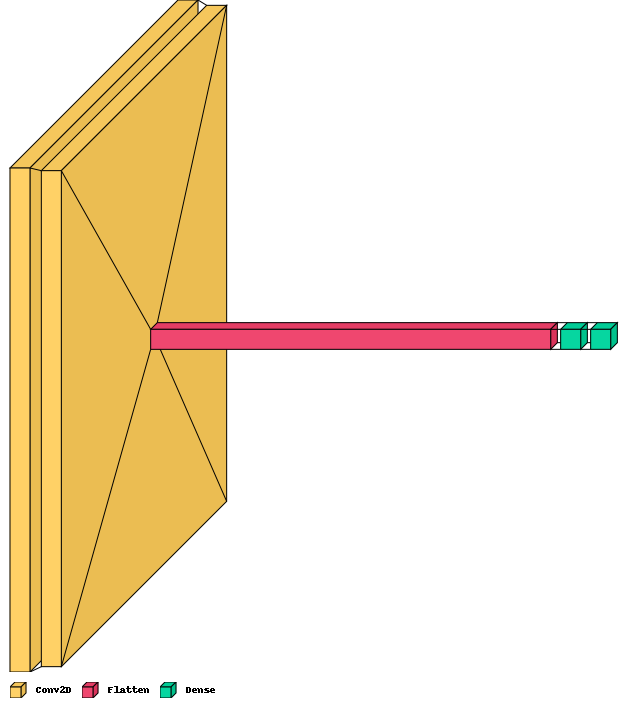

In [ ]:
visualkeras.layered_view(model, legend = True) #visualizes model

#Results

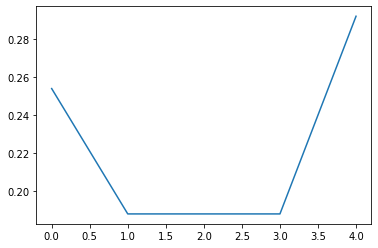

In [ ]:
#matplotlib is used to plot things in python
plt.plot(history.history['val_accuracy']) #this will return a plot of the accuracy as we run the model more and more times

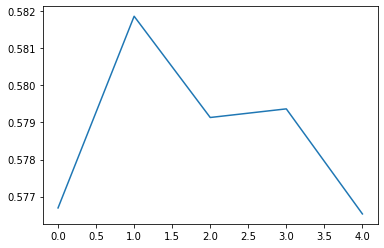

In [ ]:
#matplotlib is used to plot things in python
plt.plot(history.history['val_loss']) #this will return a plot of the loss as we run the model more and more times